**Eka Suwandi Yuliantho - 0706022210037**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Load Dataset

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/ihavenonamesad/Bank_Dataset/refs/heads/main/Bank.csv', delimiter=";")

df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2934,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
16,56,technician,married,secondary,no,4073,no,no,cellular,27,aug,239,5,-1,0,unknown,no
1966,44,blue-collar,married,primary,no,10,yes,no,cellular,17,jul,196,1,-1,0,unknown,no
1496,44,unemployed,single,secondary,no,3945,no,no,cellular,28,jan,255,1,-1,0,unknown,no
4431,37,blue-collar,married,primary,no,190,yes,yes,unknown,8,may,194,1,-1,0,unknown,no
2583,52,technician,married,tertiary,no,2557,no,no,cellular,28,jan,134,5,204,2,success,yes
3047,35,management,single,secondary,no,81,yes,no,cellular,29,jan,79,1,-1,0,unknown,no
3430,30,technician,single,tertiary,no,1922,yes,no,cellular,18,may,546,1,-1,0,unknown,no
2901,37,services,single,tertiary,no,223,yes,no,unknown,28,may,25,1,-1,0,unknown,no
3458,71,retired,married,secondary,no,2850,no,no,cellular,17,feb,185,1,-1,0,unknown,yes


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [82]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [83]:
df.dropna(inplace=True)
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [84]:
print(df.nunique())

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


In [85]:
print("\nCount of 'unknown' values per column:")
print(df.apply(lambda x: (x == 'unknown').sum()))


Count of 'unknown' values per column:
age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


In [86]:
# Replace 'unknown' in 'contact' and 'poutcome' columns with a new category 'unknown_contact' and 'unknown_poutcome'
df['contact'] = df['contact'].replace('unknown', 'unknown_contact')
df['poutcome'] = df['poutcome'].replace('unknown', 'unknown_poutcome')

# Drop rows where 'job' and 'education' have 'unknown' values (since these are fewer and may affect modeling quality)
df_c = df[(df['job'] != 'unknown') & (df['education'] != 'unknown')]

# Combine similar values in the 'job' column
df_c['job'] = df_c['job'].replace({'admin.': 'management', 'management': 'management'})

C:\Users\ekasu\AppData\Local\Temp\ipykernel_10900\1117411950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['job'] = df_c['job'].replace({'admin.': 'management', 'management': 'management'})


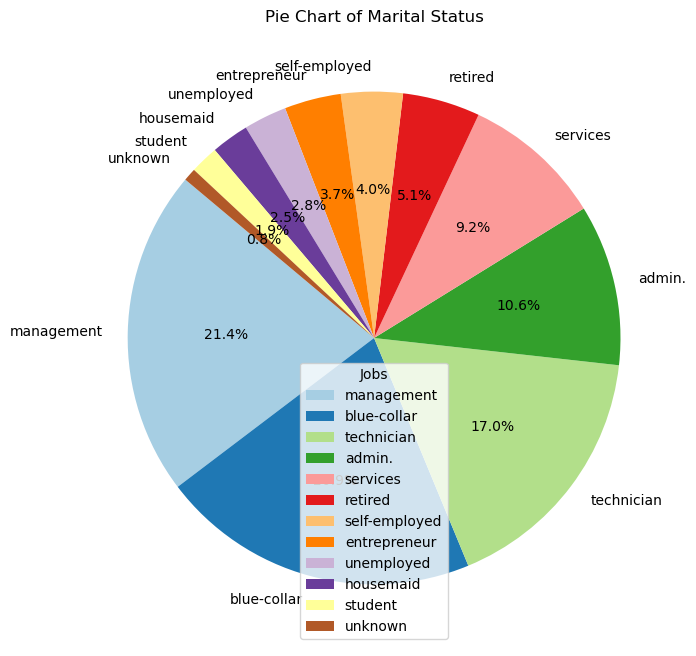

In [88]:
value_counts = df['job'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Marital Status' )
plt.legend(title='Jobs')
plt.show()
#as we can see most people have work with management meaning that companies need a lot of management workers to manage the company well

## Machine Learning (Split Data)

In [62]:
label_encoders = {}
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [63]:
X = df.drop('y', axis=1)
y = df['y']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
X_train.shape, X_test.shape

((3616, 16), (905, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [66]:
#a. Defining the model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
#b. Predict test results
y_pred_rf = rf_clf.predict(X_test)

In [68]:
#c. Accuracy score
from sklearn.metrics import accuracy_score
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_rf)))

Model accuracy score with criterion entropy: 0.9028


Random Forest


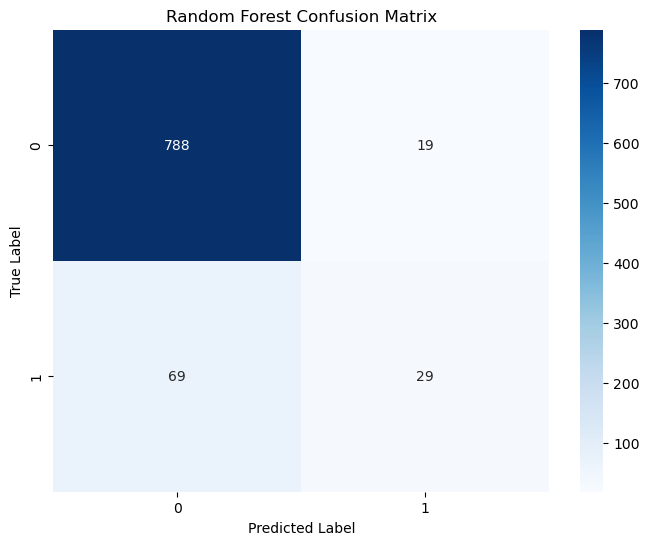

In [69]:
#d. Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Random Forest")
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [70]:
#e. Classification Report
from sklearn.metrics import classification_report
print("Random Forest Index")
print(classification_report(y_test, y_pred_rf))

Random Forest Index
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.30      0.40        98

    accuracy                           0.90       905
   macro avg       0.76      0.64      0.67       905
weighted avg       0.89      0.90      0.89       905



In [93]:
#f. results and conclusion
print("With the accuracy of random forest is 0.90, showing good overall classification performance")

With the accuracy of random forest is 0.90, showing good overall classification performance


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [71]:
#a. Defining the model
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42, max_features=3)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=3, random_state=42)

In [72]:
#b. Predict test results
y_pred_gbc = gbc_clf.predict(X_test)

In [74]:
#c. Accuracy score
from sklearn.metrics import accuracy_score
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_gbc)))

Model accuracy score with criterion entropy: 0.8961


Gradient Boosting


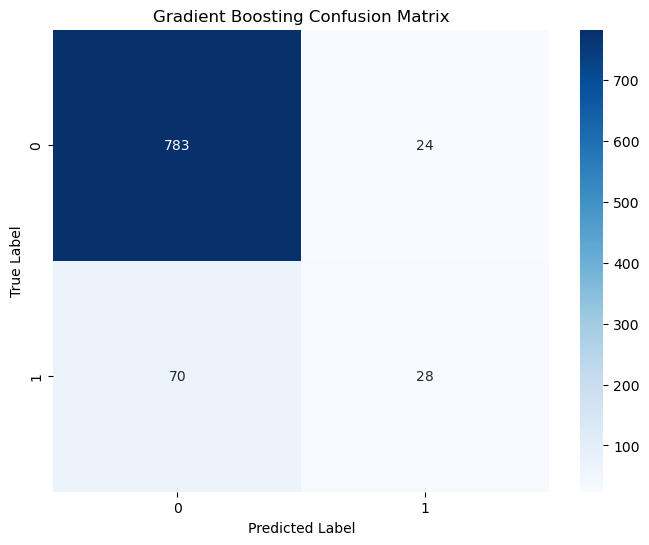

In [90]:
from sklearn.metrics import confusion_matrix
print("Gradient Boosting")
cm = confusion_matrix(y_test, y_pred_gbc)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [92]:
#e. Classification Report
from sklearn.metrics import classification_report
print("Gradient Boosting Classifier Index")
print(classification_report(y_test, y_pred_gbc))

Gradient Boosting Classifier Index
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.54      0.29      0.37        98

    accuracy                           0.90       905
   macro avg       0.73      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



In [95]:
#f. results and conclusion
print("With the accuracy of Gradient Bossting is 0.90 and Random Forest is also 0.90.")
print("This similar accuracy makes them both viable options, with neither showing a clear advantage in general classification performance.")

With the accuracy of Gradient Bossting is 0.90 and Random Forest is also 0.90.
This similar accuracy makes them both viable options, with neither showing a clear advantage in general classification performance.
